In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')


Income      Balance       0.676333
Balance     Income        0.676333
Employed    Home Owner    0.594028
Home Owner  Employed      0.594028
Income      Home Owner    0.529223
Home Owner  Income        0.529223
Income      Employed      0.524189
Employed    Income        0.524189
dtype: float64


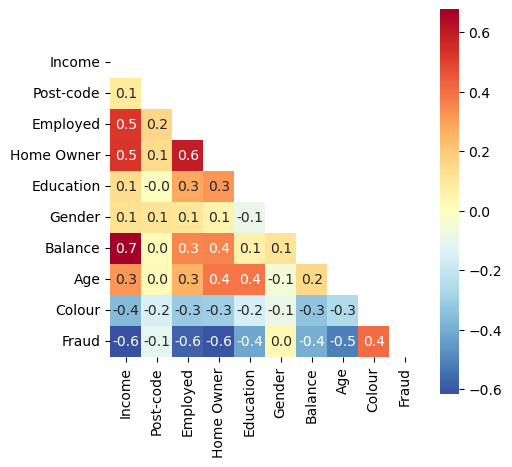

In [80]:
corr = df.corr()
unstack = corr.unstack()
print(unstack[unstack < 1][unstack > 0.5].sort_values(ascending=False))

# triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f', square=True, cmap = 'RdYlBu_r')
plt.show()